In [1]:
from scipy.spatial import distance
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:

def DBSCAN(X, clusters, eps, minPts, metric=distance.euclidean):
    currentPoint = 0

    for i in range(0, X.shape[0]):
        if clusters[i] != 0:
            continue

        neighbors = neighborsGen(X, i, eps, metric)

        if len(neighbors) < minPts:
            clusters[i] = -1

        else:
            currentPoint += 1
            clusters = expand(X, clusters, i, neighbors, currentPoint, eps, minPts, metric)
    return clusters

In [3]:
def neighborsGen(X, point, eps, metric):
    neighbors = []    
    for i in range(X.shape[0]):
        if metric(X[point], X[i]) < eps:
            neighbors.append(i)
    
    return neighbors

In [4]:
def expand(X, clusters, point, neighbors, currentPoint, eps, minPts, metric):
    clusters[point] = currentPoint  
    i = 0
    while i < len(neighbors):
        
        nextPoint = neighbors[i]
        
        if clusters[nextPoint] == -1:
            clusters[nextPoint] = currentPoint
        
        elif clusters[nextPoint] == 0:
            clusters[nextPoint] = currentPoint
            
            nextNeighbors = neighborsGen(X, nextPoint, eps, metric)
            
            if len(nextNeighbors) >= minPts:
                neighbors = neighbors + nextNeighbors
        
        i += 1
        
    return clusters

In [15]:
from sklearn.datasets import make_blobs, make_classification, make_moons, make_circles
#X, Y = make_circles(n_samples=1000, noise=0.03, factor=0.5, random_state=1)
#X, Y = make_moons(n_samples=1000, noise=0.3, random_state=0)
X, Y = make_blobs(n_samples = 1000, n_features = 2, centers = 2, random_state = 1)

In [22]:
clusters = [0] * X.shape[0]
eps=1.5
minPts=30       
clusters = DBSCAN(X, clusters, eps, minPts, metric=distance.euclidean)

In [23]:
clusters = np.array(clusters)

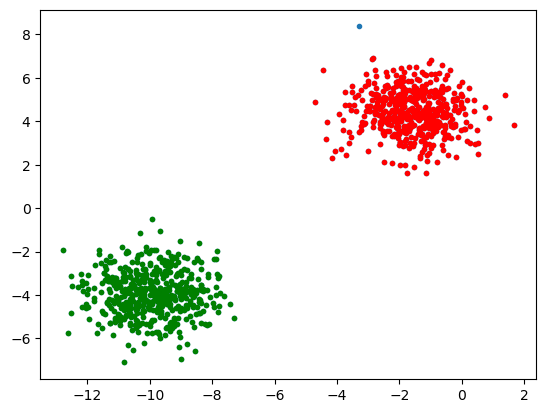

In [24]:
import matplotlib.pyplot as plt

plt.plot(X[:, 0], X[:, 1], '.')
plt.plot(X[clusters==1, 0], X[clusters==1, 1], 'r.')
plt.plot(X[clusters==2, 0], X[clusters==2, 1], 'g.')
plt.show()